In [1]:
# 读取数据
import pandas as pd

data = pd.read_csv('.//data//iris.csv')
df = data.copy()
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
110,111,6.5,3.2,5.1,2.0,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
107,108,7.3,2.9,6.3,1.8,Iris-virginica


In [2]:
# 去除无关数据并查看信息
df.drop(columns='Id', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# 查看数据是否有缺失
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))


Is there any NaN in the dataset: False


In [4]:
# 分离特征与标签
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
# 分离训练集与测试集
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train: {}'.format(np.shape(X_train)))
print('y_train: {}'.format(np.shape(y_train)))
print('X_test: {}'.format(np.shape(X_test)))
print('y_test: {}'.format(np.shape(y_test)))

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [6]:
# 建立模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = dict()

models['SVM'] = SVC(kernel='rbf')  # SVM这里我们搞个最常用的
models['KNeighbor'] = KNeighborsClassifier(n_neighbors=5)  # n_neighbors表示neighbor个数
models['RandomForest'] = RandomForestClassifier(n_estimators=100)  # n_estimators表示树的个数

In [7]:
# 定义函数以评估模型
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np


def plot_cm(model, y_true, y_pred, name=None):
    """画混淆矩阵
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def plot_cm_ratio(model, y_true, y_pred, name=None):
    """画混淆矩阵（按占各类型比例）
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    cm_ratio = np.zeros(cm.shape)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            cm_ratio[i, j] = cm[i, j] / cm[i].sum()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ratio, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def model_perf(model, y_true, y_pred, name=None):
    """返回模型分类准确率，tpr，fpr
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        # TODO: Add comments
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None


def ovo_eval(model, name=None):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plot_cm(model, y_test, prediction, name)
    plot_cm_ratio(model, y_test, prediction, name)
    model_perf(model, y_test, prediction, name)
    print('Overall Accuracy: {}'.format(model.score(X_test, y_test)))

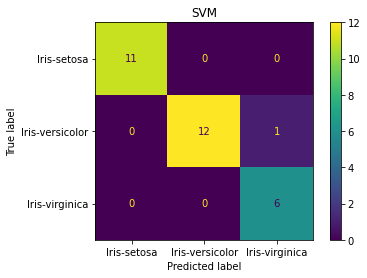

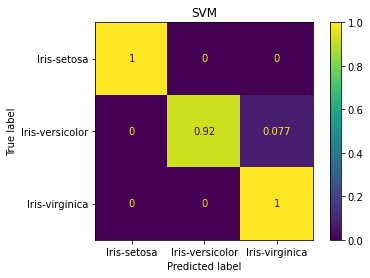

For model SVM: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9230769230769231; 
 FPR is 0.0; 
 ACC is 0.9666666666666667. 

For class Iris-virginica: 
 TPR is 1.0; 
 FPR is 0.041666666666666664; 
 ACC is 0.9666666666666667. 

Overall Accuracy: 0.9666666666666667


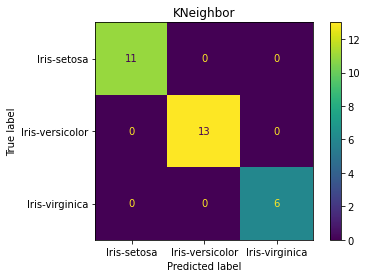

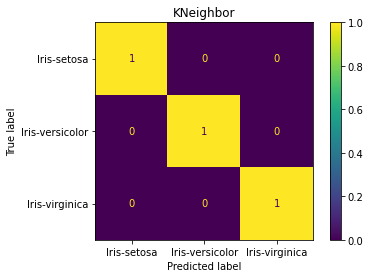

For model KNeighbor: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-virginica: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

Overall Accuracy: 1.0


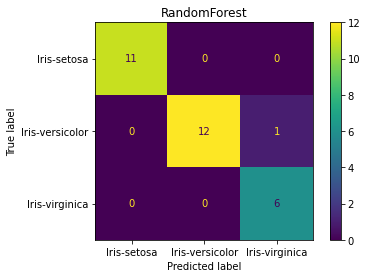

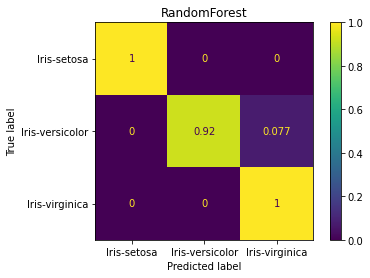

For model RandomForest: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9230769230769231; 
 FPR is 0.0; 
 ACC is 0.9666666666666667. 

For class Iris-virginica: 
 TPR is 1.0; 
 FPR is 0.041666666666666664; 
 ACC is 0.9666666666666667. 

Overall Accuracy: 0.9666666666666667


In [8]:
# 评估各模型性能
for name, model in models.items():
    ovo_eval(model, name)